Socially responsible investing (SRI) is a strategy that targets companies that promote ethical practices, environmental stewardship, and social justice. It draws inspiration from various periods in U.S. history, including the establishment of Quakerism (1700s) and the Civil Rights Movement (1960s). In recent years, the availability of socially responsible mutual funds and exchange-traded funds (ETFs) have facilitated easy and diversified investments consistent with various socially responsible values (e.g., clean energy, gender diversity). This notebook sims to perform processing and analysis on a selection of 82 socially responsible ETFs identified by ETF.com. The data contains information on the ticker (stock symbol), fund name, issuer, total assets under management (AUM), expense ration, 30-day trailing return, and market segment of each ETF.

Importing the ETF data into a DataFrame and completing the following data pre-processing operations:

* Ensuring all missing values are explicitly represented by numpy.nan
* Ensuring all numerical columns are represented by appropriate numerical types (i.e., integer or floating point values)
* Separating the elements of the SEGMENT column into distinct columns:
    * (Asset) Class: Equity or Fixed Income
    * Market: U.S., China, Developed Markets, Emerging Markets, etc.
    * Segment: Total Market, Large Cap, Small Cap, Renewable Energy, etc.

In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
%pylab inline
from dateutil.parser import parse
df = pd.read_excel('socially_responsible_etfs.xlsx')

Populating the interactive namespace from numpy and matplotlib


In [2]:
df.head()

,TICKER,FUND NAME,ISSUER,AUM,EXPENSE RATIO,3-MO TR,SEGMENT
0,DSI,iShares MSCI KLD 400 Social ETF,BlackRock,$1.31B,0.0025,0.0678,Equity: U.S. - Total Market
1,SUSA,iShares MSCI U.S.A. ESG Select ETF,BlackRock,$905.59M,0.0025,0.0673,Equity: U.S. - Total Market
2,USSG,Xtrackers MSCI U.S.A. ESG Leaders Equity ETF,Deutsche Bank,$856.18M,0.0010,--,Equity: U.S. - Total Market
3,ESGD,iShares ESG MSCI EAFE ETF,BlackRock,$643.78M,0.0020,0.0571,Equity: Developed Markets Ex-U.S. - Total Market
4,ESGE,iShares ESG MSCI EM ETF,BlackRock,$503.64M,0.0025,0.0807,Equity: Emerging Markets - Total Market


In [3]:
# Convert AUM to amount i.e. numeric
# We check what type of amounts of money exist i.e. millions, billions etc
df['AUM'].str.slice(start=-1).unique()

array(['B', 'M'], dtype=object)

In [4]:
# converting AUM to millions of USD
df['Total Assets in Millions USD'] = np.where(df['AUM'].str.slice(start=-1) == 'B', 
                                  (df['AUM'].str.slice(start=1, stop=-1).astype(float))*1000,
                                  df['AUM'].str.slice(start=1, stop=-1).astype(float))

In [5]:
df['Total Assets in Millions USD'].head()

0    1310.00
1     905.59
2     856.18
3     643.78
4     503.64
Name: Total Assets in Millions USD, dtype: float64

In [6]:
# removing the only NA value in the dataframe with np.nan
df.replace('--', np.nan, inplace=True)

In [7]:
# Adding hyphens for these categories to make splitting easy

df['SEGMENT'][df['SEGMENT']=='Equity: Global Renewable Energy'] = 'Equity: Global-Renewable Energy'
df['SEGMENT'][df['SEGMENT']=='Equity: Global Environment'] = 'Equity: Global-Environment'
df['SEGMENT'][df['SEGMENT']=='Equity: Global Water'] = 'Equity: Global-Water'

C:\Users\prave\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\prave\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\prave\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
# Removing hyphens for these categories to make splitting easy

df['SEGMENT']=df['SEGMENT'].str.replace('Broad-based',"Broad based")
df['SEGMENT']=df['SEGMENT'].str.replace('Ex-U.S.',"Ex U.S.")
df['SEGMENT']=df['SEGMENT'].str.replace('Short-Term',"Short Term")

In [9]:
# Complete pre-processing

df['CLASS']= df['SEGMENT'].str.split(pat = ':',expand = True)[0]
df['MARKET']= df['SEGMENT'].str.split(pat = '-',expand = True)[0]
df['MARKET']= df['MARKET'].str.split(pat = ':',expand = True)[1]
df['SEGMENT']= df['SEGMENT'].str.split(pat = '-',expand = True)[1]
df.set_index(keys=['ISSUER','TICKER']).sort_index(level=[0,1])

FUND NAME  \
ISSUER                       TICKER                                                      
Barclays Bank PLC            RODI                    Barclays Return on Disability ETN   
                             WIL                      Barclays Women in Leadership ETN   
BlackRock                    BGRN                        iShares Global Green Bond ETF   
                             CRBN              iShares MSCI ACWI Low Carbon Target ETF   
                             DSI                       iShares MSCI KLD 400 Social ETF   
                             EAGG                  iShares ESG U.S. Aggregate Bond ETF   
                             ESGD                            iShares ESG MSCI EAFE ETF   
                             ESGE                              iShares ESG MSCI EM ETF   
                             ESGU                          iShares ESG MSCI U.S.A. ETF   
                             ESML                iShares ESG MSCI U.S.A. Small-Cap ETF   
                             ICLN                      iShares Global Clean Energy ETF   
                             SDG                        iShares MSCI Global Impact ETF   
                             SUSA                   iShares MSCI U.S.A. ESG Select ETF   
                             SUSB          iShares ESG 1-5 Year USD Corporate Bond ETF   
                             SUSC                   iShares ESG USD Corporate Bond ETF   
Change Finance               CHGX    Change Finance U.S. Large Cap Fossil Fuel Free...   
Columbia                     ESGN    Columbia Sustainable International Equity Inco...   
                             ESGS          Columbia Sustainable U.S. Equity Income ETF   
                             ESGW        Columbia Sustainable Global Equity Income ETF   
Deutsche Bank                ACSG    Xtrackers MSCI ACWI ex U.S.A. ESG Leaders Equi...   
                             EASG           Xtrackers MSCI EAFE ESG Leaders Equity ETF   
                             EMSG    Xtrackers MSCI Emerging Markets ESG Leaders Eq...   
                             USSG         Xtrackers MSCI U.S.A. ESG Leaders Equity ETF   
ETF Managers Group           ETHO                     Etho Climate Leadership U.S. ETF   
First Trust                  FAN                    First Trust Global Wind Energy ETF   
                             QCLN    First Trust NASDAQ Clean Edge Green Energy Ind...   
Goldman Sachs                JUST         Goldman Sachs JUST U.S. Large Cap Equity ETF   
Impact Shares                NACP         Impact Shares NAACP Minority Empowerment ETF   
                             SDGA    Impact Shares Sustainable Development Goals Gl...   
                             WOMN           Impact Shares YWCA Women's Empowerment ETF   
...                                                                                ...   
Nuveen                       NUDM    Nuveen ESG International Developed Markets Equ...   
                             NUEM               Nuveen ESG Emerging Markets Equity ETF   
                             NULG                      Nuveen ESG Large-Cap Growth ETF   
                             NULV                       Nuveen ESG Large-Cap Value ETF   
                             NUMG                        Nuveen ESG Mid-Cap Growth ETF   
                             NUMV                         Nuveen ESG Mid-Cap Value ETF   
                             NUSC                             Nuveen ESG Small-Cap ETF   
OppenheimerFunds             ESGF                   Oppenheimer Global ESG Revenue ETF   
                             ESGL                          Oppenheimer ESG Revenue ETF   
Pacer Financial              VETS              Pacer Military Times Best Employers ETF   
Point Bridge Capital         MAGA                   Point Bridge GOP Stock Tracker ETF   
SS&C                         ACES                                ALPS Clean Energy ETF   
                           

Selecting a socially responsible ETF and researching the motivation and strategy behind the SRI.

In [10]:
df[df.TICKER=='ACES']

,TICKER,FUND NAME,ISSUER,AUM,EXPENSE RATIO,3-MO TR,SEGMENT,Total Assets in Millions USD,CLASS,MARKET
51,ACES,ALPS Clean Energy ETF,SS&C,$28.31M,0.0065,0.0947,Renewable Energy,28.31,Equity,Global


### ALPS Clean Energy ETF

#### Why ACES?
I wish to learn more about how money can be invested in the renewable energy sector. It is the need of the hour. I also wish to see invest in companies locally i.e. in the United States and Canada. ACES seemed like a good option to me

#### About ACES: 
The ALPS Clean Energy ETF is an equity fund aimed at investors who are looking to invest in clean renewable energy. It is comprised of a diverse set of U.S. and Canadian companies involved in the clean energy sector including renewables and clean technology. The ALPS Clean Energy ETF seeks investment results that correspond before fees and expenses, generally to the performance of the CIBC Atlas Clean Energy Index.

#### Strategy:
The focus on American and Canadian companies reduces risks relative to foreign holdings such as currency rates, financial disclosures and regulatory and policy changes, according to the ETF issuer. The ALPS Clean Energy ETF seeks investment results that correspond before fees and expenses, generally to the performance of the CIBC Atlas Clean Energy Index.

#### Top Holdings:
Familiar names in ACES' lineup include Elon Musk's Tesla Inc. TSLA, First Solar Inc. FSLR, TerraForm Power Inc. TERP and SunPower Corp. SPWR

### I wanted to analyze this data to find a good ETF to invest in. I had to answer a couple of questions for this.

a) Which markets have the highest probability of giving good returns? 
b) Within those markets, compare different segments to see which ones can give you good returns.
c) Find ETFs under these segments

I looked at the three month trailing return as a parameter to gauge returns

Populating the interactive namespace from numpy and matplotlib


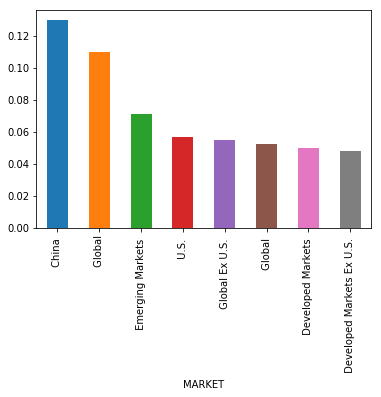

In [11]:
%pylab inline
df_return = df.groupby(['MARKET'])['3-MO TR'].mean().sort_values(ascending=False)
df_return.plot(kind='bar')

#### We see that the top 3 markets are China, Global and Emerging Markets

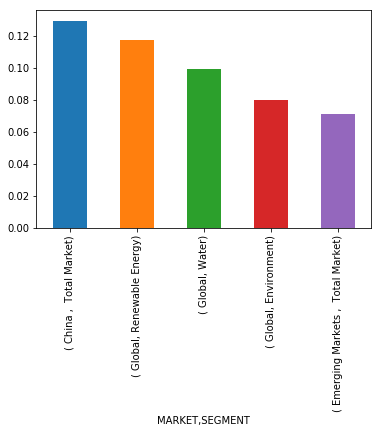

In [12]:
df_market = df[df['MARKET'].isin ([' China ', ' Global', ' Emerging Markets '])]
df_market_return = df_market.groupby(['MARKET','SEGMENT'])['3-MO TR'].mean().sort_values(ascending=False)
df_market_return.plot(kind='bar')

#### The Total Market segment in China, and Renewable Energy and Water segment in the Global Market are good ETFs to invest in overall.
#### The following is a list of top 10 companies that could be good options for investment

In [13]:
df_invest = df[(df['MARKET'].isin ([' China ', ' Global', ' Emerging Markets '])) & (df['SEGMENT'].isin ([' Total Market','Renewable Energy', 'Water']))]
df_invest = df_invest[['TICKER','FUND NAME','3-MO TR']].sort_values(by='3-MO TR', ascending=False)
df_invest.head(10)

,TICKER,FUND NAME,3-MO TR
7,TAN,Invesco Solar ETF,0.1948
17,PBW,Invesco WilderHill Clean Energy ETF,0.1605
16,CXSE,WisdomTree China ex-State-Owned Enterprises Fund,0.1586
13,ICLN,iShares Global Clean Energy ETF,0.1199
41,PBD,Invesco Global Clean Energy ETF,0.1191
76,XKCP,SPDR Kensho Clean Power ETF,0.1095
25,FAN,First Trust Global Wind Energy ETF,0.1094
69,KGRN,KraneShares MSCI China Environment ETF,0.1005
71,TBLU,Tortoise Global Water ESG Fund,0.0994
51,ACES,ALPS Clean Energy ETF,0.0947


### Using Yahoo Finance API to pull data of ticker of choice and analyze its performance over time

I have chosen Apple stocks

In [14]:
start = '2010-01-01'
end = dt.datetime.now() # today

ticker = 'AAPL'

df_api = web.DataReader(ticker, 'yahoo', start, end) # I am pulling Apple stocks from the Yahoo API

In [15]:
df_api.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.307869
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.342979
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.019398
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,19.982389
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,20.115240
2010-01-11,30.428572,29.778572,30.400000,30.015715,115557400.0,19.937790
2010-01-12,29.967142,29.488571,29.884285,29.674286,148614900.0,19.710993
2010-01-13,30.132856,29.157143,29.695715,30.092857,151473000.0,19.989031
2010-01-14,30.065714,29.860001,30.015715,29.918571,108223500.0,19.873259


Observing the ETF information (i.e., price and trading volume data) from December 28, 2018, the last trading day of the year, which marked the end of a significant (negative) correction in the financial markets. 

In [16]:
dec28 = dt.datetime(year=2018,day=28,month=12)
df_dec28 = df_api[df_api.index == dec28]
df_dec28

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-28,158.520004,154.550003,157.5,156.229996,42291400.0,154.966034


Observing the ETF information from 75 days later (March 13, 2019). 

In [17]:
march13 = dec28 + dt.timedelta(days=75)
df_mar13 = df_api[df_api.index == march13]
df_mar13

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-13,183.300003,180.919998,182.25,181.710007,31032500.0,181.012924


Looking at the percentage change in closing stock price

In [18]:
print('The closing price of',ticker,'has changed by', round((100*(df_mar13.Open[0] - df_dec28.Open[0])/df_dec28.Open[0]),2), '% between', df_dec28.index[0].date(), 'and', df_mar13.index[0].date())

The closing price of AAPL has changed by 15.71 % between 2018-12-28 and 2019-03-13


### Exploratory Analysis

The below function plot_price visualizes the complete time series of a specified price column (i.e., Open, High, Low, or Close) over a specified period for a given ticker. The function takes in the ETF data frame and a price argument that specifies the type of price (as a string) that we wish to visualize. The period is defined using separate arguments - start and end. The performance of the function has been demonstrated on the Close price of a ticker for the full date range and for the last year.

In [19]:
def plot_price(table, price, DateStart=None, DateEnd=None):
    price_categories = ['High','Low','Open','Close']
    if(price in price_categories):
        if DateStart == None:
            DateStart = 'Jan 1 2010'

        if DateEnd == None:
            DateEnd = datetime.datetime.strftime(dt.datetime.now().date(), '%b %d %Y')

        try:
            if (parse(DateStart) < parse(DateEnd)):
                plt.figure(figsize=(20,10))
                y_price = table[price][(table.index >= DateStart) & (table.index <= DateEnd)]
                x_date = y_price.index
                #plt.xticks((np.arange(parse(DateStart), parse(DateStart), 1.0)))
                #plt.yticks(np.arange(min(y_price), max(y_price), 1.0))
                plt.rcParams.update({'font.size': 16})
                plt.ylabel(str(price))
                plt.xlabel(str(y_price.index.name))
                plot_title = str(price) + ' over the time period ' + str(parse(DateStart).date()) + ' to ' + str(parse(DateEnd).date())
                plt.title(plot_title)
                plt.tight_layout()
                #fig, ax = plt.subplots()
                #fig.autofmt_xdate()
                plt.plot(x_date, y_price)
                #plt.plot(x_date, y_price,'r.', markersize=5, lw=0.5)
                
            else:
                print('Start Date has to be lesser than End Date')
                
        except ValueError:
            print('Please enter correct date format.')
            
    else:
        print('Please enter valid valid price category.')   

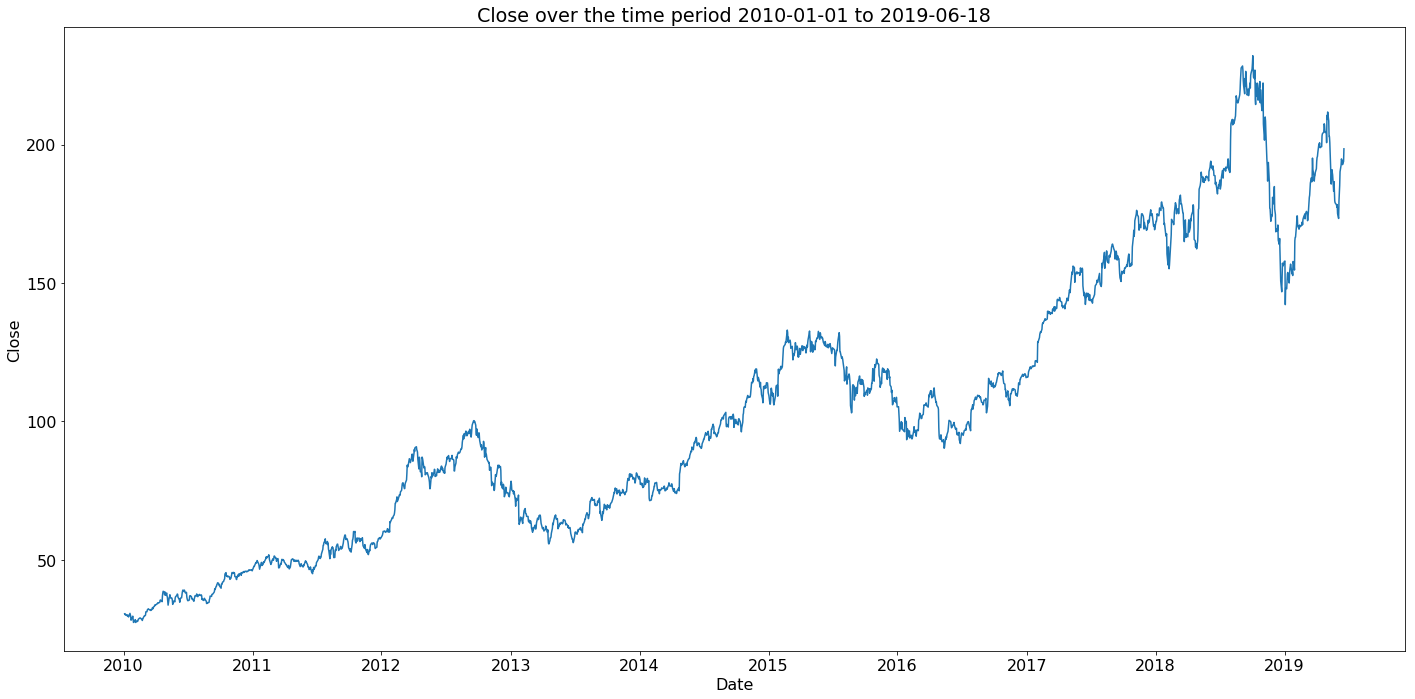

In [20]:
plot_price(df_api,'Close')

We see that Closing stock price of Apple stocks are fairly rising consistently throughout the time period 2010-2019. We see a considerable dip at the end of 2018. I suspect that this has something to do with the release of the iPhone X. The model was found to be faulty on many counts and this may have caused stock prices to drop.

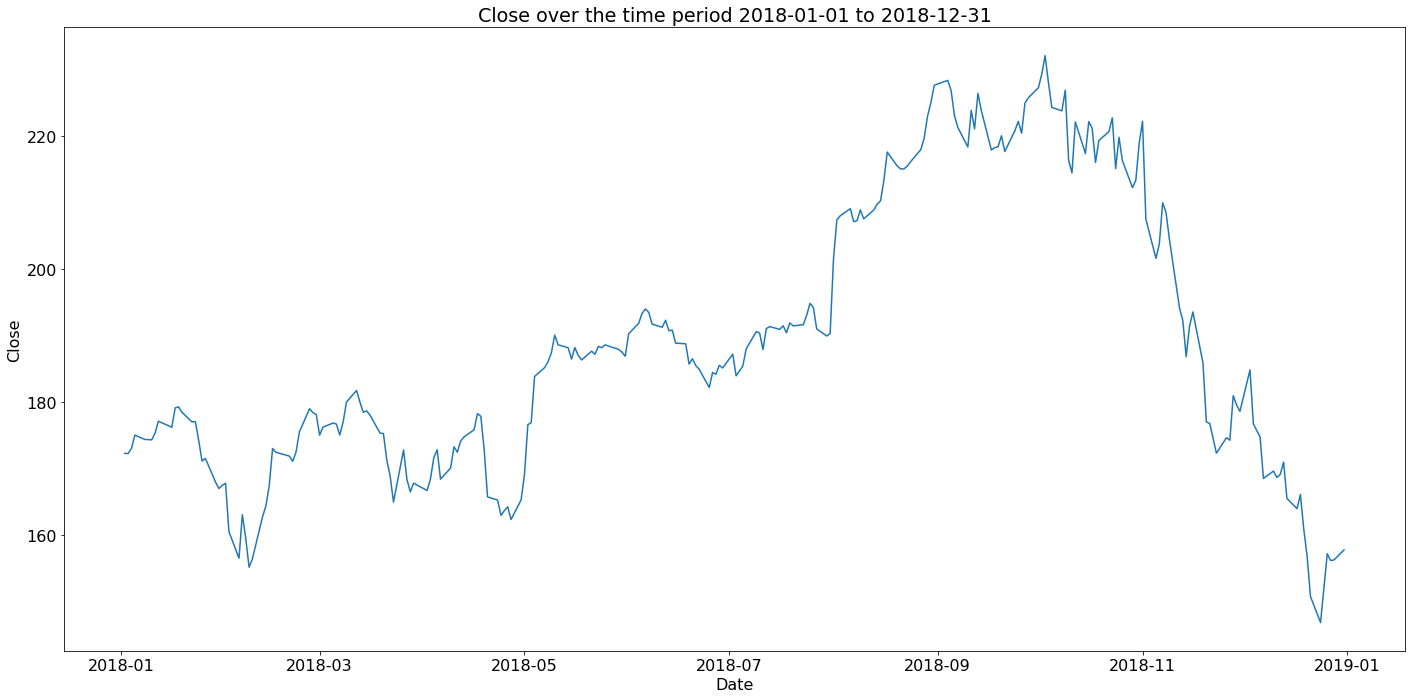

In [21]:
plot_price(df_api,'Close','01-01-2018','December 31 2018')

### Trend Analysis on Simple Moving Averages 

Modifying the plot_price function to visualize an optional simple moving average (SMA) and/or an optional exponentially weighted moving average (EWMA), along with the specified price column  over a specified date range. The SMA argument is None by default, but is specified as an integer over which the SMA is calculated. The argument for the exponentially weighted moving average is implemented in a similar manner. Each moving average is overlaid with the price on a similar visualization as in the previous function. The performance of the function has been demonstrated on the Close price of the selected ticker for the last year.

In [24]:
def plot_price2(table, price, DateStart=None, DateEnd=None, sma=None,ewma=None):
    price_categories = ['High','Low','Open','Close']
    if(price in price_categories):
        if DateStart == None:
            DateStart = 'Jan 1 2010'

        if DateEnd == None:
            DateEnd = datetime.datetime.strftime(dt.datetime.now().date(), '%b %d %Y')

        try:
            if (parse(DateStart) < parse(DateEnd)):
                plt.figure(figsize=(20,10))
                y_price = table[price][(table.index >= DateStart) & (table.index <= DateEnd)]
                x_date = y_price.index
                #plt.xticks((np.arange(parse(DateStart), parse(DateStart), 1.0)))
                #plt.yticks(np.arange(min(y_price), max(y_price), 1.0))
                plt.rcParams.update({'font.size': 16})
                plt.ylabel(str(price))
                plt.xlabel(str(y_price.index.name))
                plot_title = str(price) + ' over the time period ' + str(parse(DateStart).date()) + ' to ' + str(parse(DateEnd).date())
                plt.title(plot_title)
                plt.tight_layout()
                # fig,ax = plt.subplots()
                # ax.axis('scaled')
                plt.plot(x_date, y_price)
                # plt.plot(x_date, y_price,'r.', markersize=5, lw=0.5)
                if (sma!=None) or (sma!=0) or (type(sma)==int):
                    y_price.rolling(sma).mean().plot()
                    sma_string = str(sma) + '-day Period SMA for ' + str(price)
                    plt.legend(('Humidity',sma_string))
                if (ewma!=None) or (ewma!=0) or (type(ewma)==int):
                    y_price.ewm(span=ewma).mean().plot()
                    ewma_string = str(ewma) + '-day Period EWMA for ' + str(price)
                
                plt.legend((price,sma_string,ewma_string))
                
            else:
                print('Start Date has to be lesser than End Date')
                
        except ValueError:
            print('Please enter correct date format.')
            
    else:
        print('Please enter valid valid price category.')   

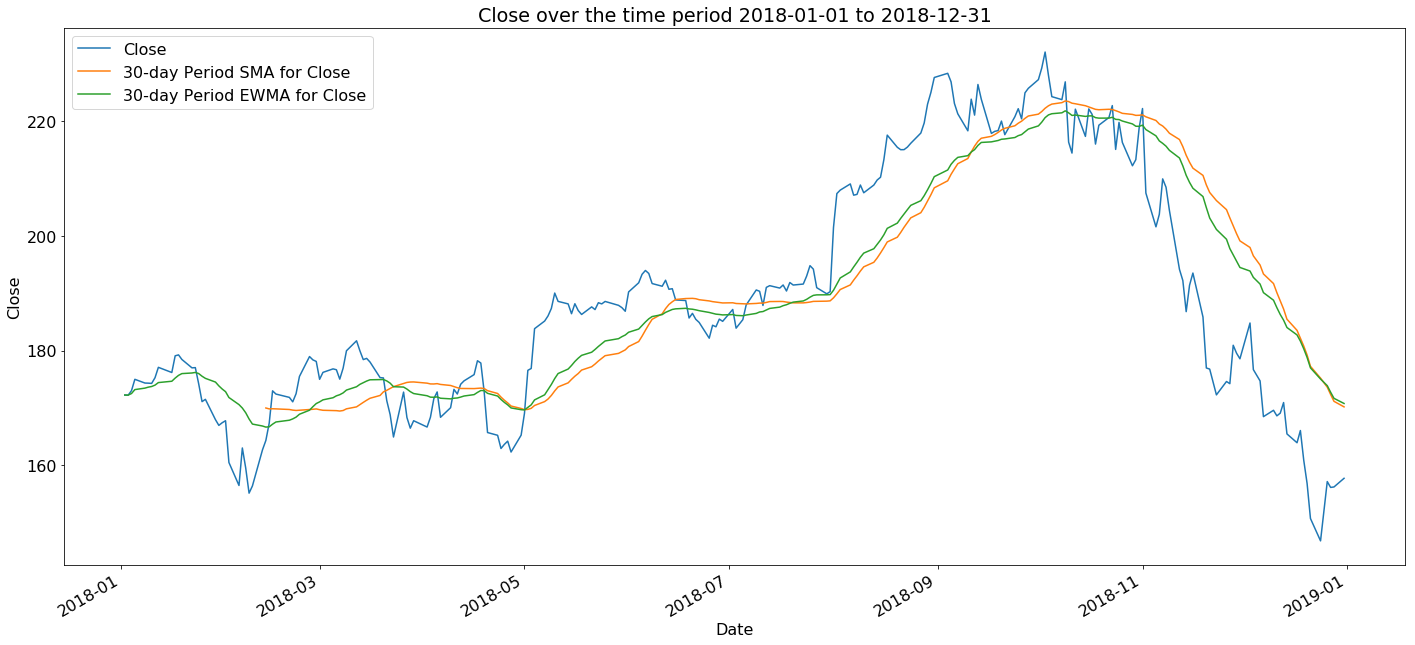

In [25]:
plot_price2(df_api,'Close','Jan 1 2018','December 31 2018',30,30)

### Trend Analysis on Aggregate Trading Volume

The function plot_volume visualizes the trend in aggregate trading volume over a downsampled period. The function takes in the historical price data frame for a given ticker and a frequency argument. The function sums the total trading volume over the specified time period, which is monthly, quarterly or annually. The performance of the function has been demonstrated on the quarterly volume of the selected ticker for the full date range.

In [26]:
def plot_volume(table, period, DateStart=None, DateEnd=None):
    if DateStart == None:
        DateStart = 'Jan 1 2010'
    
    if DateEnd == None:
        DateEnd = datetime.datetime.strftime(dt.datetime.now().date(), '%b %d %Y')

    try:
        if (parse(DateStart) < parse(DateEnd)):
            plt.figure(figsize=(20,10))
            y_volume = table['Volume'][(table.index >= DateStart) & (table.index <= DateEnd)]
            try:
                if(period != 'D'):
                    y_volume.resample(period).sum().plot(figsize = (20,10))
                    plt.rcParams.update({'font.size': 16})
                    plt.ylabel('Volume')
                    plt.xlabel(str(y_volume.index.name))
                    plot_title = 'Volume over the time period ' + str(parse(DateStart).date()) + ' to ' + str(parse(DateEnd).date())
                    plt.title(plot_title)
                    plt.tight_layout()
                
                else:
                    print('Choose frequency other than D.')
            except ValueError:
                print('Invalid Frequency chosen')
                
        else:
            print('Start Date has to be lesser than End Date')
                
    except ValueError:
        print('Please enter correct date format.') 

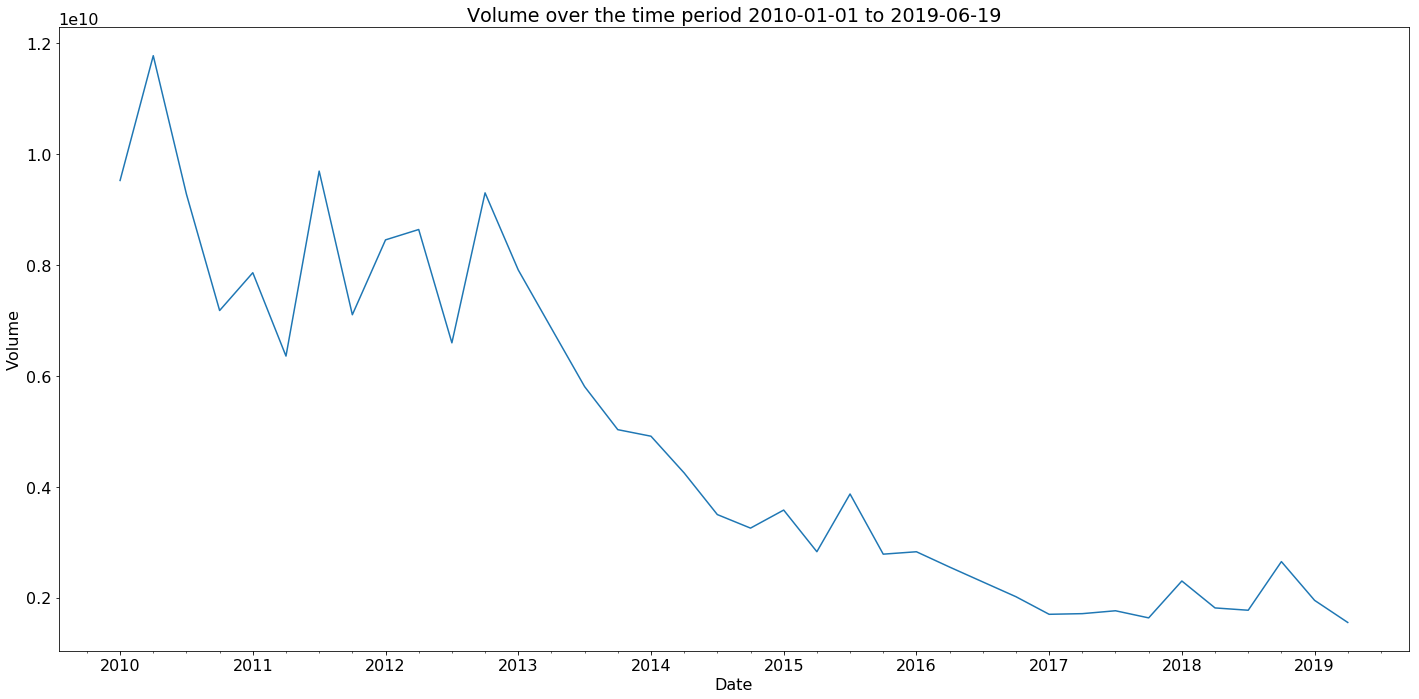

In [27]:
plot_volume(df_api,'Q',None,None)

The plot above gives us an idea of the cumulative sum of how many shares were traded in any given quarter. They have been dipping gradually for Apple from 2010 to 2019. 